In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

from config import RAW_DATA_DIR

# Show all rows and columns
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

# Show full width
pd.set_option("display.max_colwidth", None)
pd.set_option("display.width", 0)

### Shelter System Flow

In [2]:
sys_flow = pd.read_csv(RAW_DATA_DIR / "toronto-shelter-system-flow.csv")
sys_flow.head()

_id date(mmm-yy) population_group  returned_from_housing  \
0    1       Jan-18   All Population                     46   
1    2       Jan-18          Chronic                     11   
2    3       Jan-18         Refugees                      4   
3    4       Jan-18         Families                      0   
4    5       Jan-18            Youth                     12   

   returned_to_shelter  newly_identified  moved_to_housing  became_inactive  \
0                  494              1106               508              862   
1                   29               317               111              111   
2                   32               651               328               75   
3                   14               561               321               57   
4                   64               116                44              116   

   actively_homeless  ageunder16  age16-24  age25-34  age35-44  age45-54  \
0               7958        1233      1111      1341      1560      1318   
1               2532         223       346       313       403       505   
2               2408         914       241       414       547       204   
3               2277        1232       187       276       411       130   
4                924           0       924         0         0         0   

   age55-64  age65over  gender_male  gender_female  \
0       973        422         4963           2912   
1       495        247         1632            870   
2        66         22         1219           1177   
3        23         18          968           1308   
4         0          0          571            312   

   gender_transgender,non-binary_or_two_spirit population_group_percentage  
0                                           83                      100.0%  
1                                           30                       31.8%  
2                                           12                       30.3%  
3                                            1                       28.6%  
4                                           41                       11.6%

In [3]:
sys_flow.isna().sum()

_id                                            0
date(mmm-yy)                                   0
population_group                               0
returned_from_housing                          0
returned_to_shelter                            0
newly_identified                               0
moved_to_housing                               0
became_inactive                                0
actively_homeless                              0
ageunder16                                     0
age16-24                                       0
age25-34                                       0
age35-44                                       0
age45-54                                       0
age55-64                                       0
age65over                                      0
gender_male                                    0
gender_female                                  0
gender_transgender,non-binary_or_two_spirit    0
population_group_percentage                    0
dtype: int64

<Figure size 1200x700 with 0 Axes>

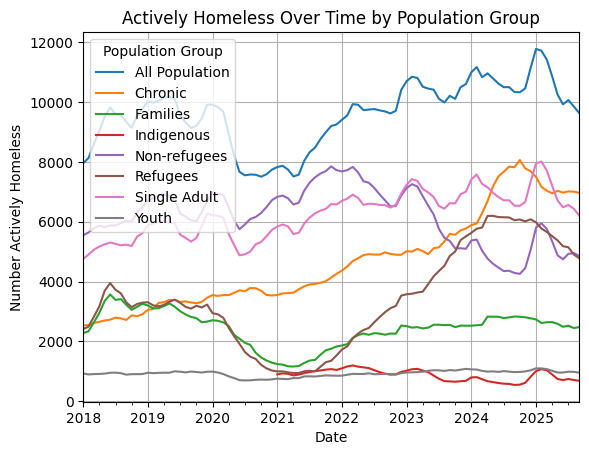

In [4]:
sys_flow["date(mmm-yy)"] = pd.to_datetime(sys_flow["date(mmm-yy)"], format="%b-%y")
pivot_df = sys_flow.pivot(
    index="date(mmm-yy)", columns="population_group", values="actively_homeless"
)
pivot_df = pivot_df.sort_index()

plt.figure(figsize=(12, 7))
pivot_df.plot(kind="line")

plt.title("Actively Homeless Over Time by Population Group")
plt.xlabel("Date")
plt.ylabel("Number Actively Homeless")
plt.legend(title="Population Group")
plt.grid()
plt.show()

Sharpest increase amongst refugees

### Shelter Locations (City Hostel Serviced)

In [5]:
xls_path = RAW_DATA_DIR / "shelter-locations-readme.xls"

xls = pd.ExcelFile(xls_path, engine="xlrd")
print(xls.sheet_names)  # See which sheets exist

df = pd.read_excel(
    xls_path,
    engine="xlrd",
    header=1,  # Real headers start on the second row
    usecols="A:C",  # Item name, Description, Datatype cols
)

df = df.dropna(how="all").reset_index(drop=True)
df.columns = ["ITEM_NAME", "DESCRIPTION", "DATATYPE"]
df = df.drop(0)
df

['Sheet1', 'Sheet2', 'Sheet3']


ITEM_NAME  \
1          FID   
2        SHAPE   
3   ADDRESS_PO   
4   ADDRESS_FU   
5   POSTAL_COD   
6   MUNICIPALI   
7         CITY   
8   CENTRELINE   
9     OBJECTID   
10        WARD   
11  NEIGHBOURH   
12  NEIGHBOU_1   
13  COMMUNITY_   
14  CONFIDENTI   
15       MOTEL   
16    CAPACITY   
17        NAME   
18        TYPE   
19       TYPE2   
20     CITY_OP   

                                                                  DESCRIPTION  \
1                                                                  Feature ID   
2                                                     Feature type e.g. point   
3                                      Unique geographical Address Identifier   
4                                                      Full municipal address   
5                                                                 Postal code   
6                                                    Former city municipality   
7                                                                     Toronto   
8   The unique geographic identifier of the street segment the address is on    
9                                                          Object identifier    
10                                     Toronto Electoral Ward name and number   
11                                                           Neighbourhood Id   
12                                                         Neighbourhood name   
13                                                          Community Council   
14                                                                     Y or N   
15                                                                         Y    
16                                                                        NaN   
17                                                            Name of shelter   
18                                                           Single or Family   
19                        Single Women, Mixed Adult, Family, Youth,Singe Men.   
20                                                      City operation e.g. Y   

   DATATYPE  
1   Numeric  
2       NaN  
3   Numeric  
4       NaN  
5       NaN  
6       NaN  
7       NaN  
8   Numeric  
9   Numeric  
10      NaN  
11      NaN  
12      NaN  
13      NaN  
14      NaN  
15      NaN  
16      NaN  
17      NaN  
18      NaN  
19      NaN  
20      NaN

In [6]:
import geopandas as gpd

shelter_locations_df = gpd.read_file(RAW_DATA_DIR / "shelters_wgs84.shp")
shelter_locations_df.to_csv(RAW_DATA_DIR / "shelter_wgs8.csv")

shelter_locations_df.head(5)

ADDRESS_PO        ADDRESS_FU POSTAL_COD      MUNICIPALI     CITY  \
0      808260   70 Gerrard St E     M5B1G6  former TORONTO  Toronto   
1     9531684  3410 Bayview Ave     M2M3S3      NORTH YORK  Toronto   
2     2591634    87 Pembroke St     M5A2N9  former TORONTO  Toronto   
3     8067796      129 Peter St     M5V2H3  former TORONTO  Toronto   
4     6362877    191 Spadina Rd     M5R2T9  former TORONTO  Toronto   

   CENTRELINE  OBJECTID                          WARD NEIGHBOURH  \
0     1143800        44  Toronto Centre-Rosedale (27)         75   
1     9531674        45               Willowdale (24)         50   
2    14020526        46  Toronto Centre-Rosedale (27)         73   
3    20139637        47          Trinity-Spadina (20)         77   
4     6362837        48          Trinity-Spadina (20)         95   

                           NEIGHBOU_1  \
0               Church-Yonge Corridor   
1                    Newtonbrook East   
2                           Moss Park   
3  Waterfront Communities-The Islands   
4                               Annex   

                                COMMUNITY_ CONFIDENTI MOTEL CAPACITY  \
0  TORONTO AND EAST YORK COMMUNITY COUNCIL          N  None       38   
1             NORTH YORK COMMUNITY COUNCIL          N  None       30   
2  TORONTO AND EAST YORK COMMUNITY COUNCIL          N  None       33   
3  TORONTO AND EAST YORK COMMUNITY COUNCIL          N  None   VARIES   
4  TORONTO AND EAST YORK COMMUNITY COUNCIL          N  None       24   

                                            NAME    TYPE         TYPE2  \
0              St. Vincent De Paul - Mary's Home  Single  Single Women   
1    St. Vincent De Paul - St. Clare's Residence  Single  Single Women   
2                 Street Haven at the Crossroads  Single  Single Women   
3  Streets to Homes Assessment & Referral Centre  Single   Mixed Adult   
4                       Toronto Community Hostel  Family        Family   

  CITY_OP                    geometry  
0    None  POINT (-79.37841 43.66015)  
1    None  POINT (-79.39544 43.79811)  
2    None  POINT (-79.37243 43.65924)  
3       Y  POINT (-79.39324 43.64875)  
4    None  POINT (-79.40628 43.67362)

In [7]:
shelter_locations_df.isna().sum()

ADDRESS_PO     0
ADDRESS_FU     0
POSTAL_COD     1
MUNICIPALI     0
CITY           0
CENTRELINE     0
OBJECTID       0
WARD           0
NEIGHBOURH     0
NEIGHBOU_1     0
COMMUNITY_     0
CONFIDENTI     0
MOTEL         55
CAPACITY       0
NAME           0
TYPE           0
TYPE2          0
CITY_OP       45
geometry       0
dtype: int64

['Single Women' 'Mixed Adult' 'Family' 'Youth' 'Single Men']


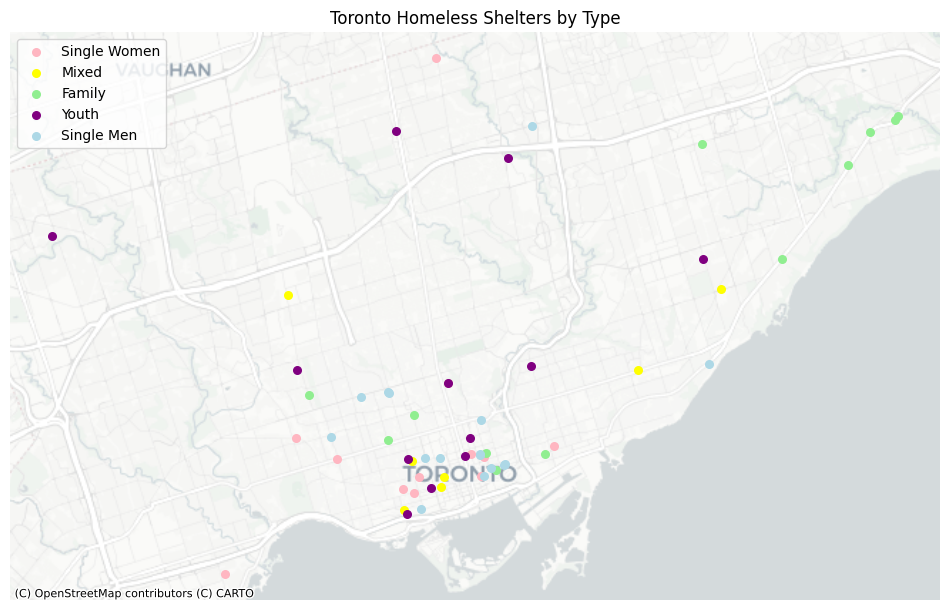

In [8]:
import contextily as cx

shelters_webmer = shelter_locations_df.to_crs(epsg=3857)

print(shelter_locations_df["TYPE2"].unique())

shelter_locations_single_wom = shelters_webmer[
    shelter_locations_df["TYPE2"] == "Single Women"
]
shelter_locations_mixed = shelters_webmer[
    shelter_locations_df["TYPE2"] == "Mixed Adult"
]
shelter_locations_family = shelters_webmer[shelter_locations_df["TYPE2"] == "Family"]
shelter_locations_youth = shelters_webmer[shelter_locations_df["TYPE2"] == "Youth"]
shelter_locations_single_men = shelters_webmer[
    shelter_locations_df["TYPE2"] == "Single Men"
]

fig, ax = plt.subplots(figsize=(12, 10))

shelter_locations_single_wom.plot(
    ax=ax, color="lightpink", markersize=30, label="Single Women"
)
shelter_locations_mixed.plot(ax=ax, color="yellow", markersize=30, label="Mixed")
shelter_locations_family.plot(ax=ax, color="lightgreen", markersize=30, label="Family")
shelter_locations_youth.plot(ax=ax, color="purple", markersize=30, label="Youth")
shelter_locations_single_men.plot(
    ax=ax, color="lightblue", markersize=30, label="Single Men"
)

cx.add_basemap(ax=ax, source=cx.providers.CartoDB.Positron)

plt.title("Toronto Homeless Shelters by Type")
plt.axis("off")
plt.legend()
plt.show()

### Daily Shelter & Overnight Service Occupancy & Capacity

In [9]:
daily_occ_cap_df = pd.read_csv(
    RAW_DATA_DIR / "daily-shelter-overnight-service-occupancy-capacity-2024.csv"
)

daily_occ_cap_df.head(10)

_id OCCUPANCY_DATE  ORGANIZATION_ID  \
0    1     2024-01-01               24   
1    2     2024-01-01               24   
2    3     2024-01-01               24   
3    4     2024-01-01               24   
4    5     2024-01-01               24   
5    6     2024-01-01               14   
6    7     2024-01-01               14   
7    8     2024-01-01               14   
8    9     2024-01-01               14   
9   10     2024-01-01               14   

                         ORGANIZATION_NAME  SHELTER_ID  \
0                 COSTI Immigrant Services          40   
1                 COSTI Immigrant Services          40   
2                 COSTI Immigrant Services          40   
3                 COSTI Immigrant Services          40   
4                 COSTI Immigrant Services          40   
5  Christie Ossington Neighbourhood Centre          22   
6  Christie Ossington Neighbourhood Centre          22   
7  Christie Ossington Neighbourhood Centre          22   
8  Christie Ossington Neighbourhood Centre          22   
9  Christie Ossington Neighbourhood Centre          22   

                     SHELTER_GROUP  LOCATION_ID  \
0           COSTI Reception Centre       1320.0   
1           COSTI Reception Centre       1320.0   
2           COSTI Reception Centre       1051.0   
3           COSTI Reception Centre       1114.0   
4           COSTI Reception Centre       1114.0   
5  Christie Ossington Men's Hostel       1160.0   
6  Christie Ossington Men's Hostel       1172.0   
7  Christie Ossington Men's Hostel       1029.0   
8  Christie Ossington Men's Hostel       1102.0   
9  Christie Ossington Men's Hostel       1541.0   

                      LOCATION_NAME     LOCATION_ADDRESS LOCATION_POSTAL_CODE  \
0         COSTI Hotel Program Dixon        640 Dixon Rd.              M9W 1J1   
1         COSTI Hotel Program Dixon        640 Dixon Rd.              M9W 1J1   
2            COSTI Reception Centre    100 Lippincott St              M5S 2P1   
3        COSTI Uptown Hotel Program      55 Hallcrown Pl              M2J 4R1   
4        COSTI Uptown Hotel Program      55 Hallcrown Pl              M2J 4R1   
5      CONC Etobicoke Hotel Program     445 Rexdale Blvd              M9W 6P8   
6       CONC West End Hotel Program  14 Roncesvalles Ave              M6R 2K3   
7  CONC Men's Shelter Lansdowne Ave    973 Lansdowne Ave              M6H 3Z5   
8     CONC Men's Shelter Bloor St W       850 Bloor St W              M6G 1M2   
9   Christie Ossington - Spadina Rd       136 Spadina Rd              M5R 2T8   

  LOCATION_CITY LOCATION_PROVINCE  PROGRAM_ID  \
0       Toronto                ON       16892   
1       Toronto                ON       16891   
2       Toronto                ON       12251   
3    North York                ON       15372   
4    North York                ON       13751   
5     Etobicoke                ON       16111   
6       Toronto                ON       15711   
7       Toronto                ON       12011   
8       Toronto                ON       13611   
9       Toronto                ON       17891   

                                       PROGRAM_NAME       SECTOR  \
0  COSTI - Hotel Program - Dixon (Refugee Families)     Families   
1   COSTI - Hotel Program - Dixon (Refugee Singles)  Mixed Adult   
2               COSTI Reception Centre CITY Program  Mixed Adult   
3      COSTI Uptown Hotel COVID-19 - Family Program     Families   
4                 COSTI Uptown Hotel Family Program     Families   
5        CONC Etobicoke Hotel Program - Mixed Adult  Mixed Adult   
6                          CONC Men's Hotel Program          Men   
7                   Christie Ossington Men's Hostel          Men   
8             Christie Ossington Men's Hostel South          Men   
9    Christie Ossington Warming Centre - Spadina Rd  Mixed Adult   

  PROGRAM_MODEL OVERNIGHT_SERVICE_TYPE  \
0     Emergency    Motel/Hotel Shelter   
1     Emergency    Motel/Hotel Shelter   
2     Emergency                S

In [10]:
# Keeping shelters that work with beds instead of rooms
daily_occ_cap_df = daily_occ_cap_df[daily_occ_cap_df['CAPACITY_TYPE'] == 'Bed Based Capacity']
daily_occ_cap_df.head()

_id OCCUPANCY_DATE  ORGANIZATION_ID  \
2     3     2024-01-01               24   
7     8     2024-01-01               14   
8     9     2024-01-01               14   
9    10     2024-01-01               14   
12   13     2024-01-01                1   

                          ORGANIZATION_NAME  SHELTER_ID  \
2                  COSTI Immigrant Services          40   
7   Christie Ossington Neighbourhood Centre          22   
8   Christie Ossington Neighbourhood Centre          22   
9   Christie Ossington Neighbourhood Centre          22   
12                          City of Toronto          53   

                      SHELTER_GROUP  LOCATION_ID  \
2            COSTI Reception Centre       1051.0   
7   Christie Ossington Men's Hostel       1029.0   
8   Christie Ossington Men's Hostel       1102.0   
9   Christie Ossington Men's Hostel       1541.0   
12               Birkdale Residence       1561.0   

                       LOCATION_NAME                LOCATION_ADDRESS  \
2             COSTI Reception Centre               100 Lippincott St   
7   CONC Men's Shelter Lansdowne Ave               973 Lansdowne Ave   
8      CONC Men's Shelter Bloor St W                  850 Bloor St W   
9    Christie Ossington - Spadina Rd                  136 Spadina Rd   
12    885 Scarborough Golf Club Road  885 Scarborough Golf Club Road   

   LOCATION_POSTAL_CODE LOCATION_CITY LOCATION_PROVINCE  PROGRAM_ID  \
2               M5S 2P1       Toronto                ON       12251   
7               M6H 3Z5       Toronto                ON       12011   
8               M6G 1M2       Toronto                ON       13611   
9               M5R 2T8       Toronto                ON       17891   
12              M1G 1J6       Toronto                ON       17931   

                                          PROGRAM_NAME       SECTOR  \
2                  COSTI Reception Centre CITY Program  Mixed Adult   
7                      Christie Ossington Men's Hostel          Men   
8                Christie Ossington Men's Hostel South          Men   
9       Christie Ossington Warming Centre - Spadina Rd  Mixed Adult   
12  TSSS - Warming Centre - Scarborough Golf Club Road  Mixed Adult   

   PROGRAM_MODEL OVERNIGHT_SERVICE_TYPE  \
2      Emergency                Shelter   
7      Emergency                Shelter   
8      Emergency                Shelter   
9      Emergency         Warming Centre   
12     Emergency         Warming Centre   

                                  PROGRAM_AREA  SERVICE_USER_COUNT  \
2                       Base Program - Refugee                   8   
7   Base Shelter and Overnight Services System                  42   
8   Base Shelter and Overnight Services System                  30   
9                              Winter Programs                  19   
12                             Winter Programs                  21   

         CAPACITY_TYPE  CAPACITY_ACTUAL_BED  CAPACITY_FUNDING_BED  \
2   Bed Based Capacity                  8.0                   8.0   
7   Bed Based Capacity                 42.0                  42.0   
8   Bed Based Capacity                 30.0                  30.0   
9   Bed Based Capacity                 23.0                  23.0   
12  Bed Based Capacity                 48.0                  48.0   

    OCCUPIED_BEDS  UNOCCUPIED_BEDS  UNAVAILABLE_BEDS  CAPACITY_ACTUAL_ROOM  \
2             8.0              0.0               0.0                   NaN   
7            42.0              0.0               0.0                   NaN   
8            30.0              0.0               0.0                   NaN   
9            19.0              4.0               0.0                   NaN   
12           21.0             27.0               0.0                   NaN   

    CAPACITY_FUNDING_ROOM  OCCUPIED_ROOMS  UNOCCUPIED_ROOMS  \
2                     NaN             NaN               NaN   
7                     NaN             NaN               NaN   
8                     NaN            

In [11]:
print(daily_occ_cap_df.shape)
daily_occ_cap_df[
    [
        "SERVICE_USER_COUNT",
        "CAPACITY_ACTUAL_BED",
        "CAPACITY_FUNDING_BED",
        "OCCUPIED_BEDS",
        "UNOCCUPIED_BEDS",
        "UNAVAILABLE_BEDS",
        "OCCUPANCY_RATE_BEDS",
    ]
].describe().drop(index='count')

(34766, 32)


SERVICE_USER_COUNT  CAPACITY_ACTUAL_BED  CAPACITY_FUNDING_BED  \
mean           47.600098             48.04444             49.004746   
std            43.843958             43.74754             44.112112   
min             1.000000              1.00000              2.000000   
25%            23.000000             23.00000             24.000000   
50%            36.000000             36.00000             37.000000   
75%            62.000000             62.00000             66.000000   
max           278.000000            278.00000            278.000000   

      OCCUPIED_BEDS  UNOCCUPIED_BEDS  UNAVAILABLE_BEDS  OCCUPANCY_RATE_BEDS  
mean      47.600098         0.444342          0.960306            98.004505  
std       43.843958         1.718151          5.697982             6.948390  
min        1.000000        -1.000000         -1.000000             2.040000  
25%       23.000000         0.000000          0.000000           100.000000  
50%       36.000000         0.000000          0.000000           100.000000  
75%       62.000000         0.000000          0.000000           100.000000  
max      278.000000        80.000000        139.000000           101.470000

In [12]:
daily_occ_cap_df.isna().sum()

_id                           0
OCCUPANCY_DATE                0
ORGANIZATION_ID               0
ORGANIZATION_NAME             0
SHELTER_ID                    0
SHELTER_GROUP                 0
LOCATION_ID                   5
LOCATION_NAME               371
LOCATION_ADDRESS           1495
LOCATION_POSTAL_CODE       1469
LOCATION_CITY              1484
LOCATION_PROVINCE          1484
PROGRAM_ID                    0
PROGRAM_NAME                  0
SECTOR                        0
PROGRAM_MODEL                 0
OVERNIGHT_SERVICE_TYPE        0
PROGRAM_AREA                  0
SERVICE_USER_COUNT            0
CAPACITY_TYPE                 0
CAPACITY_ACTUAL_BED           0
CAPACITY_FUNDING_BED          0
OCCUPIED_BEDS                 0
UNOCCUPIED_BEDS               0
UNAVAILABLE_BEDS              0
CAPACITY_ACTUAL_ROOM      34766
CAPACITY_FUNDING_ROOM     34766
OCCUPIED_ROOMS            34766
UNOCCUPIED_ROOMS          34766
UNAVAILABLE_ROOMS         34766
OCCUPANCY_RATE_BEDS           0
OCCUPANC

In [13]:
num_shelter_daily_occ_cap = daily_occ_cap_df["LOCATION_ADDRESS"].nunique()
num_shelter_locations = shelter_locations_df["NAME"].nunique()

print(f"There are a total of {num_shelter_daily_occ_cap} shelters in the daily occ + cap dataset")
print(f"There are a total of {num_shelter_locations} shelters in the shelter location dataset")

num_programs = daily_occ_cap_df["PROGRAM_NAME"].nunique()
actual_programs = daily_occ_cap_df["PROGRAM_NAME"].unique()
print(f"There are a total of {num_programs} programs")

num_sectors = daily_occ_cap_df["SECTOR"].nunique()
actual_sectors = daily_occ_cap_df["SECTOR"].unique()
print(f"There are a total of {num_sectors}: {actual_sectors}")

There are a total of 77 shelters in the daily occ + cap dataset
There are a total of 59 shelters in the shelter location dataset
There are a total of 114 programs
There are a total of 4: ['Mixed Adult' 'Men' 'Women' 'Youth']


In [14]:
for sector in actual_sectors:
    num_locations = daily_occ_cap_df[daily_occ_cap_df['SECTOR'] == sector]['LOCATION_ADDRESS'].nunique()
    print(f"There are {num_locations} shelters for the {sector} sector")

print("\nOverlap possible since a shelter can accodomate multiple different sectors")

There are 28 shelters for the Mixed Adult sector
There are 22 shelters for the Men sector
There are 18 shelters for the Women sector
There are 16 shelters for the Youth sector

Overlap possible since a shelter can accodomate multiple different sectors


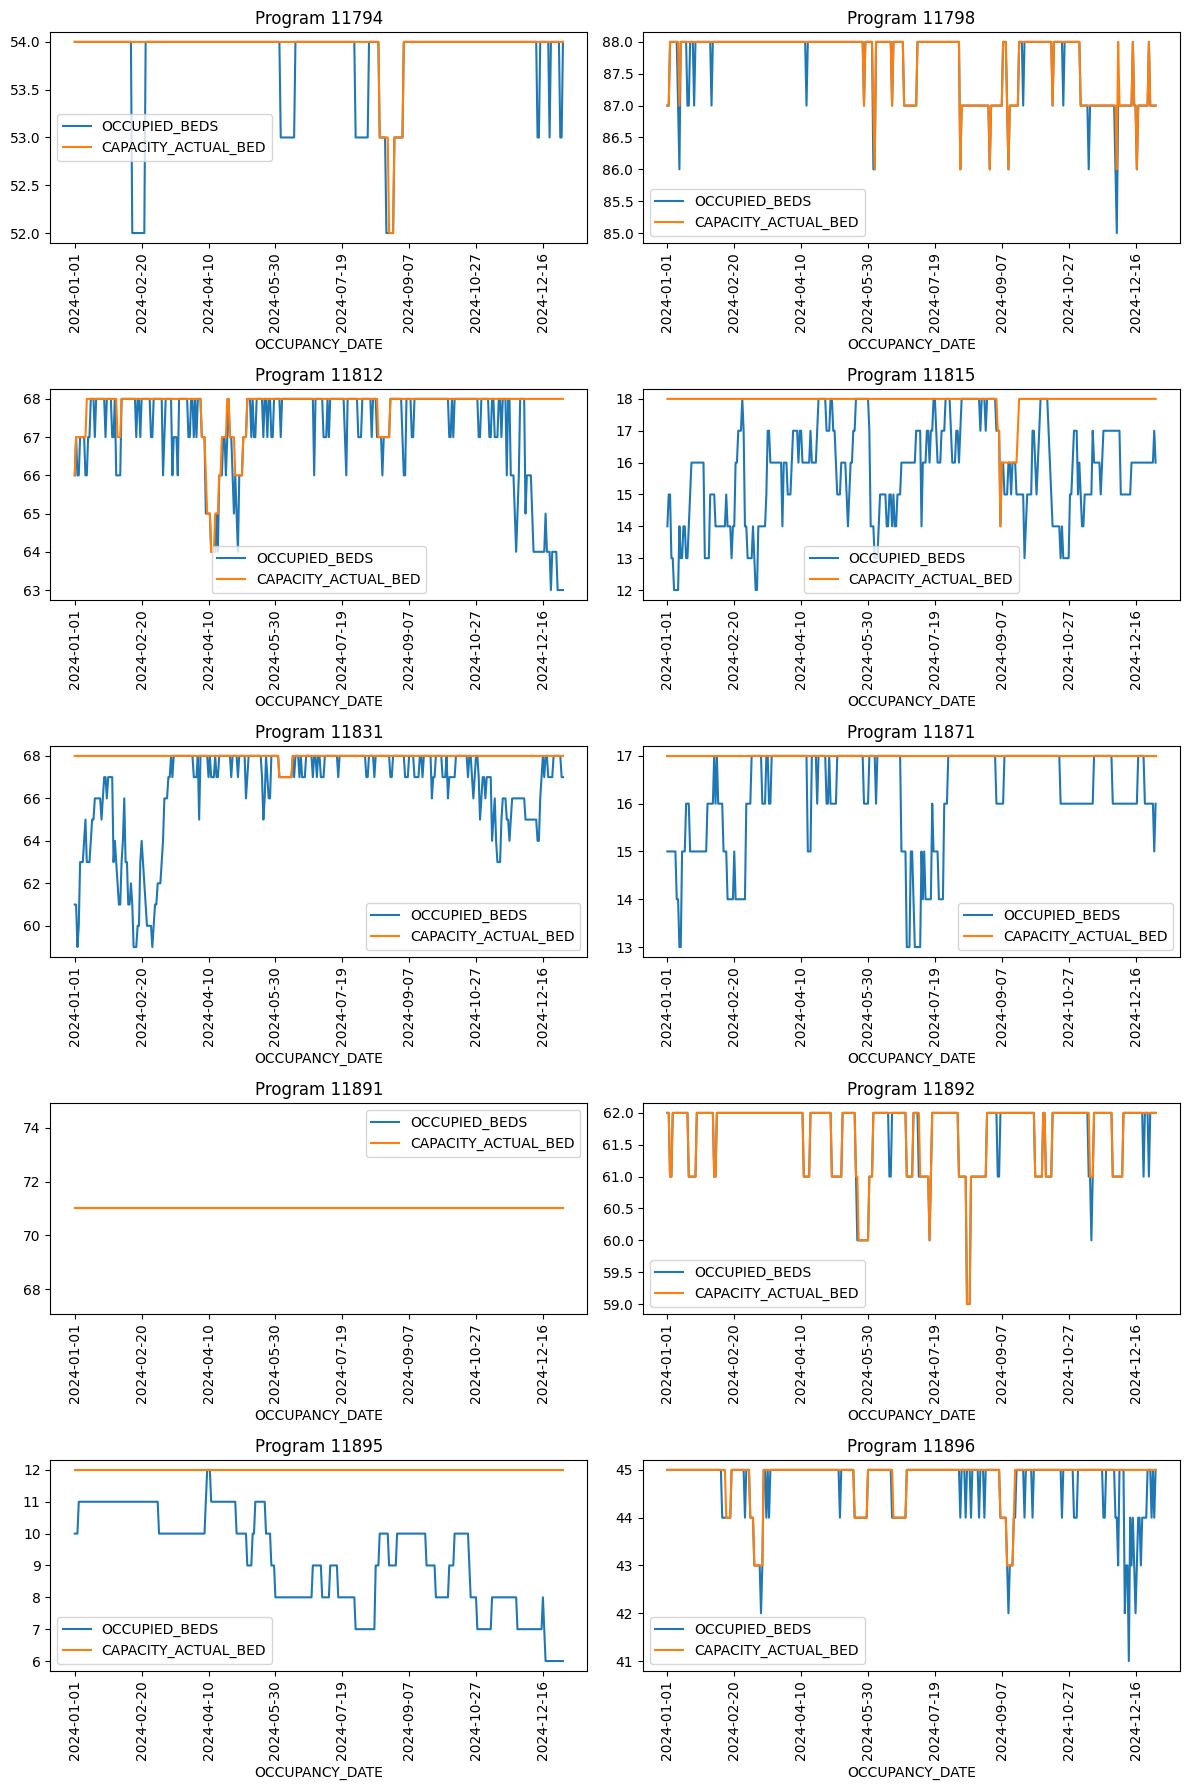

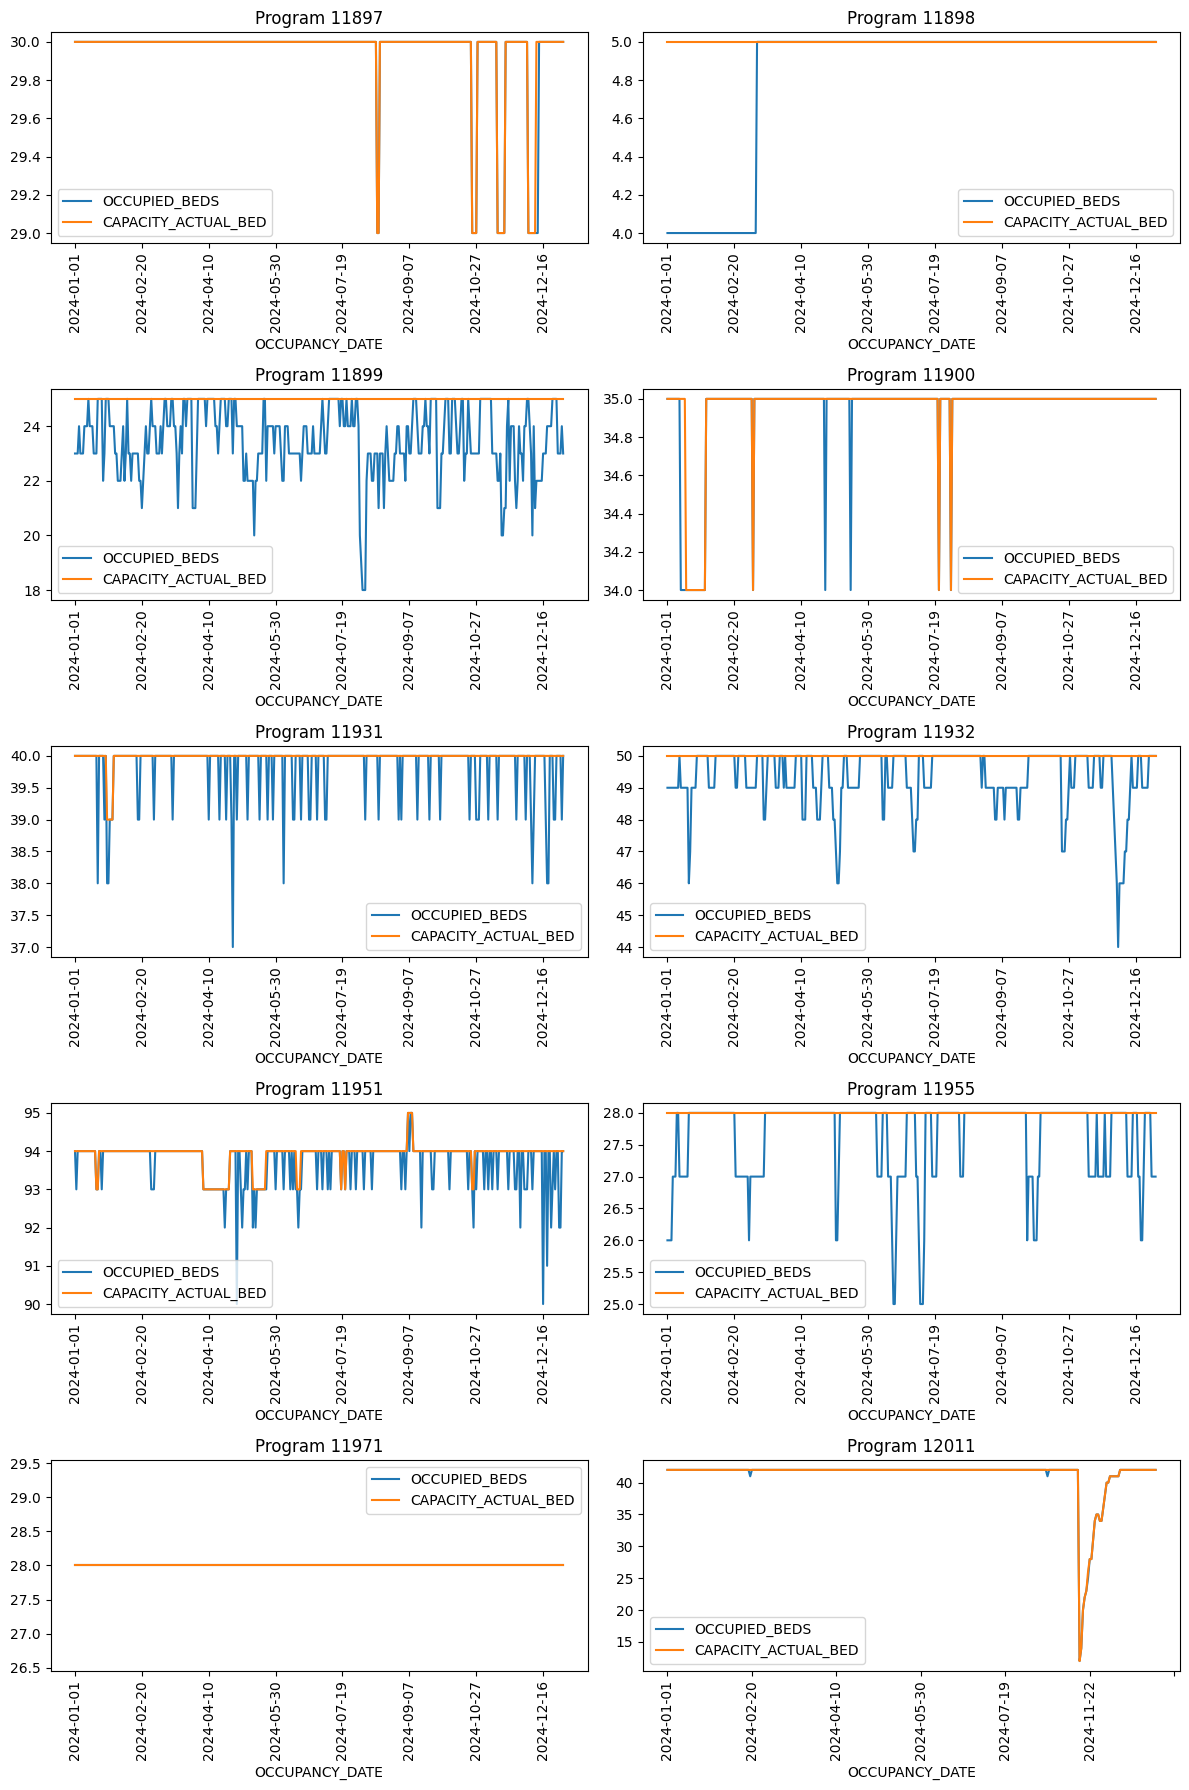

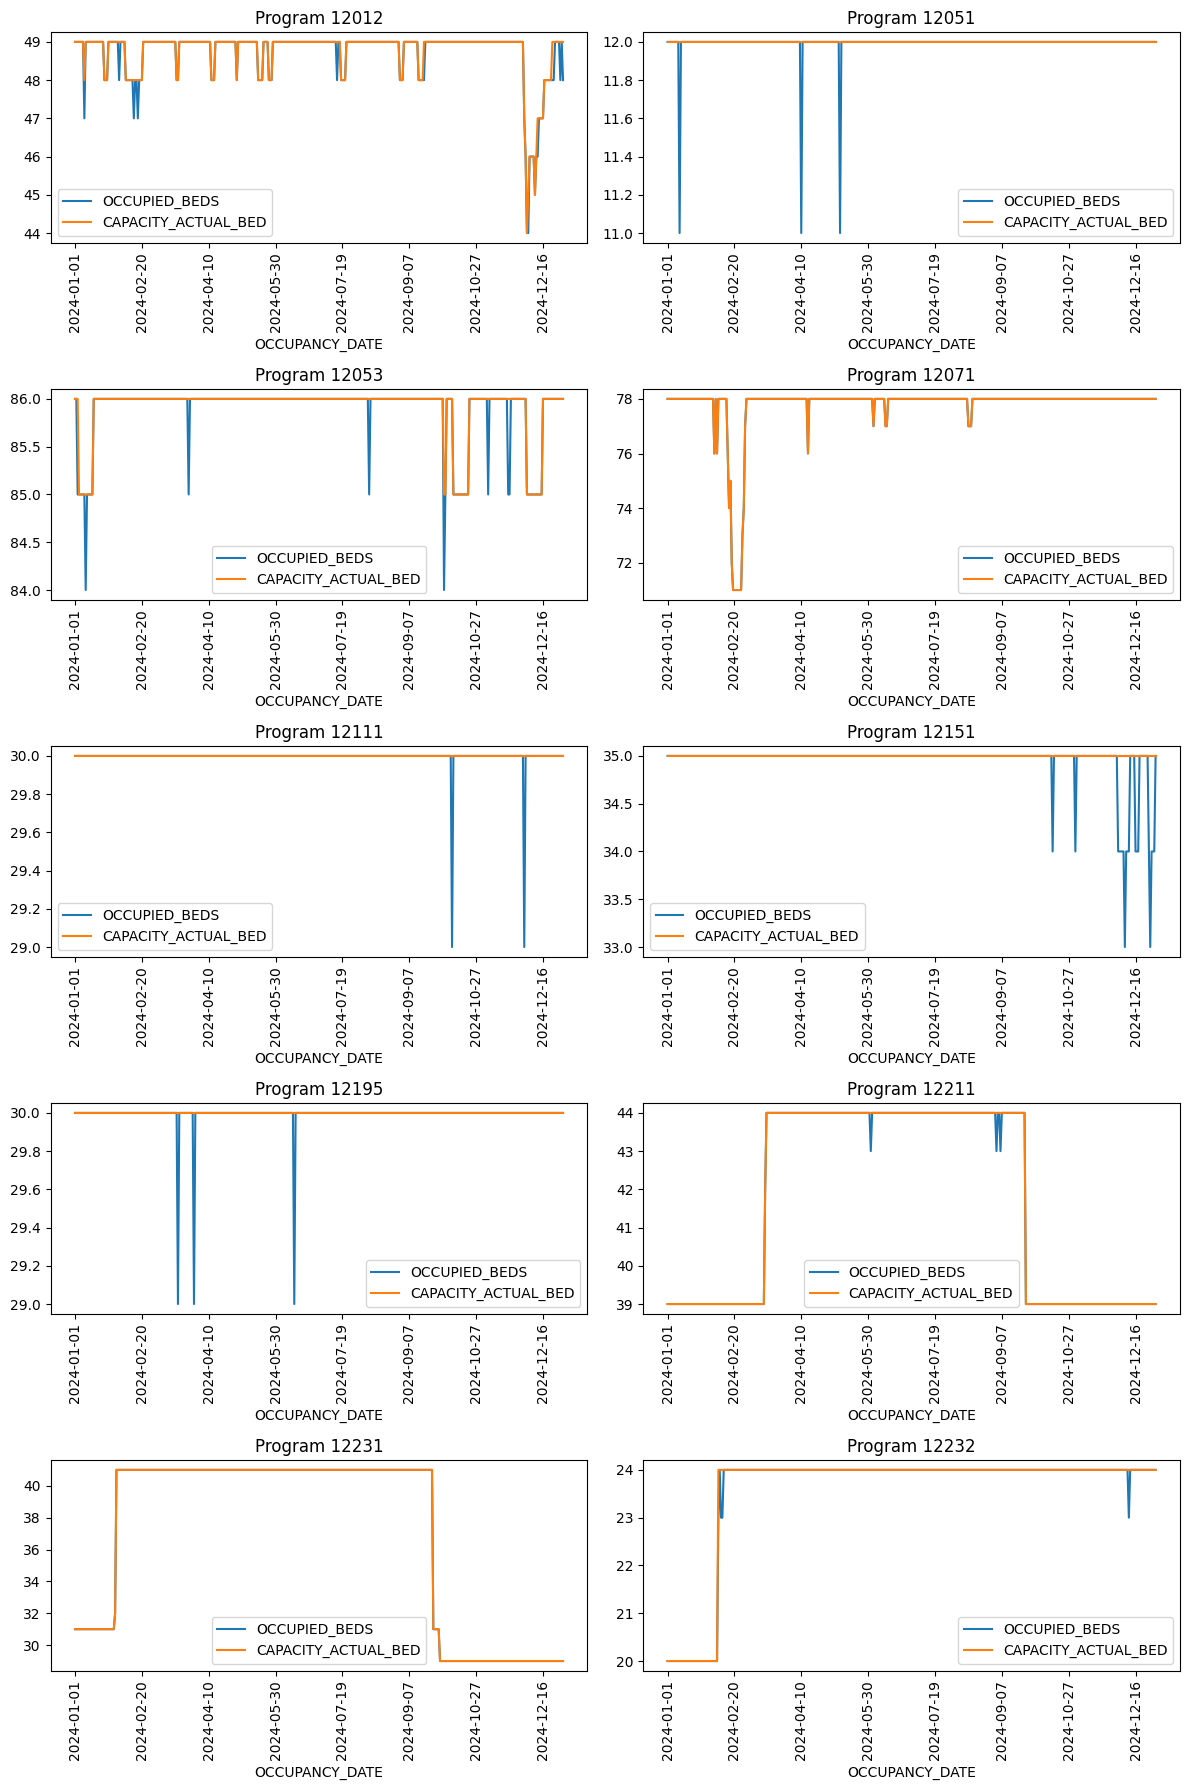

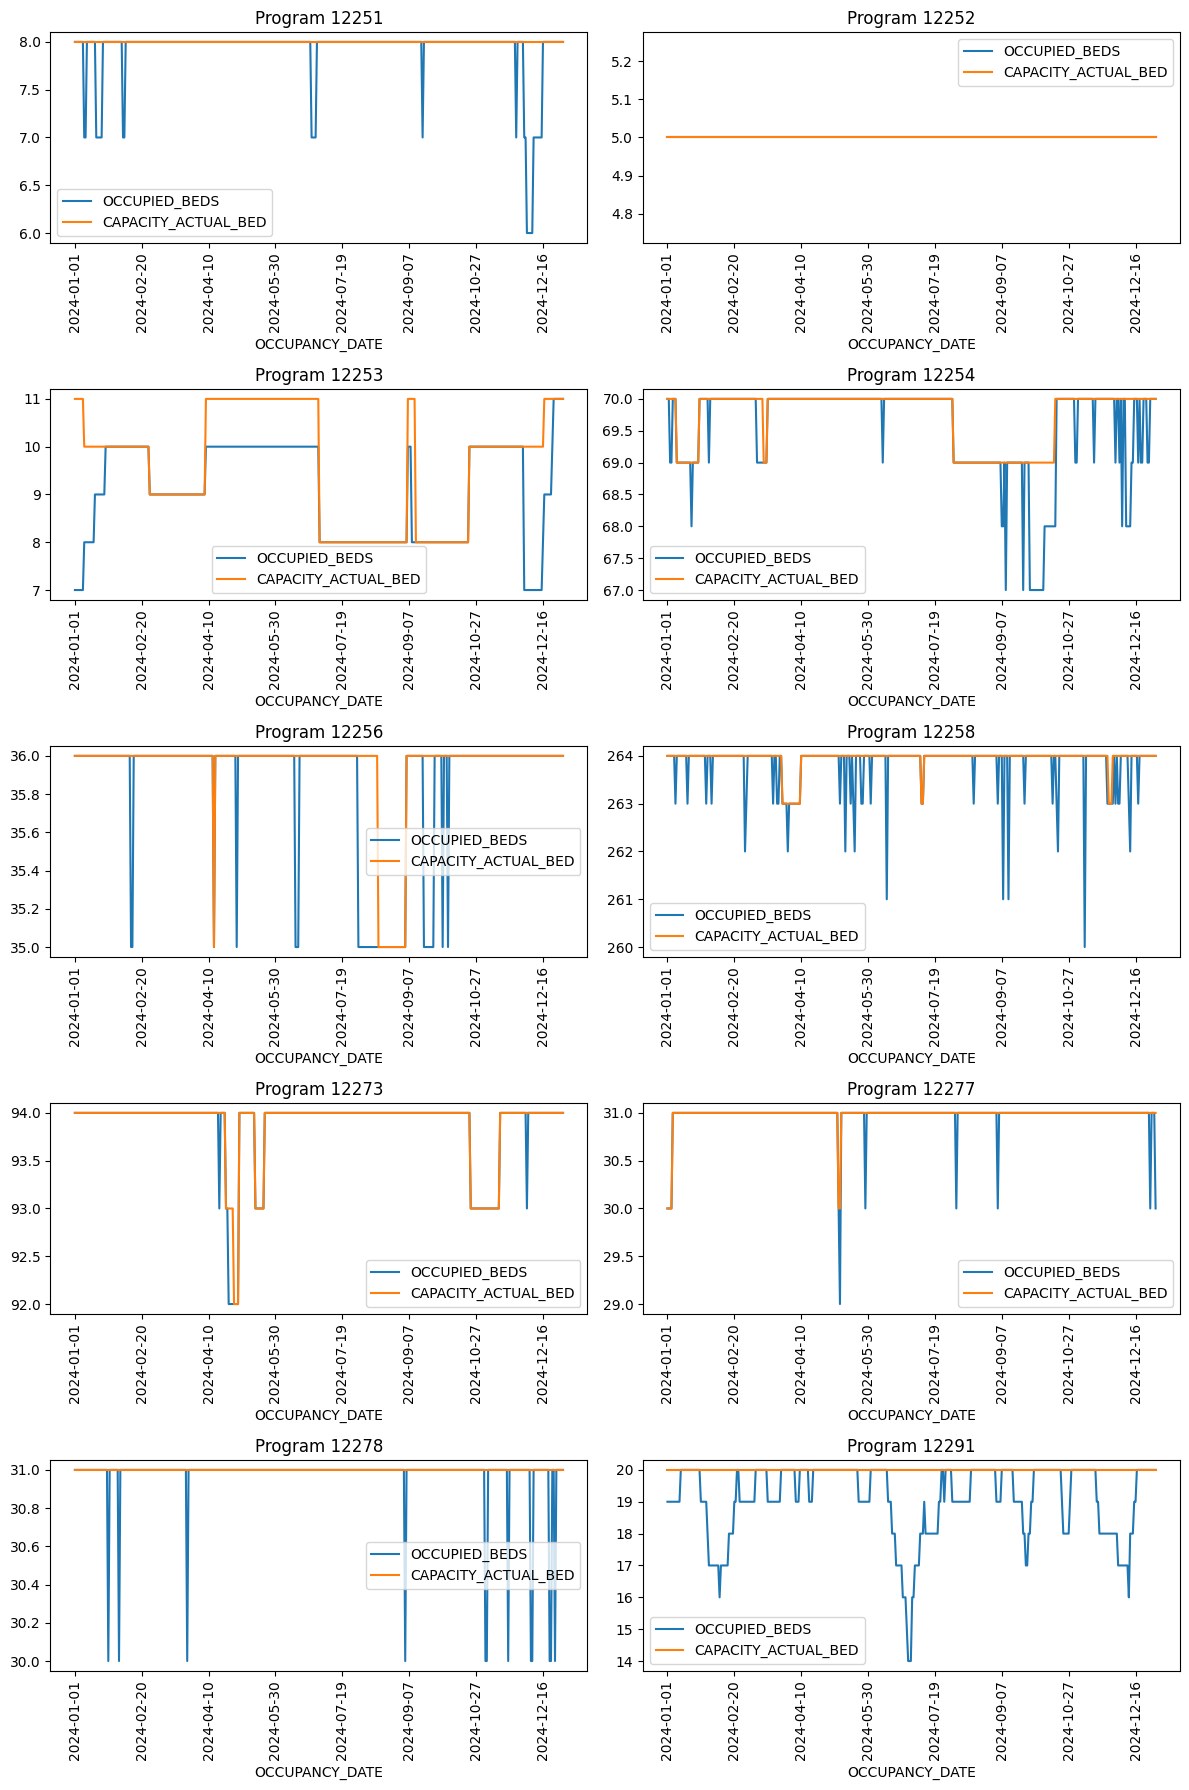

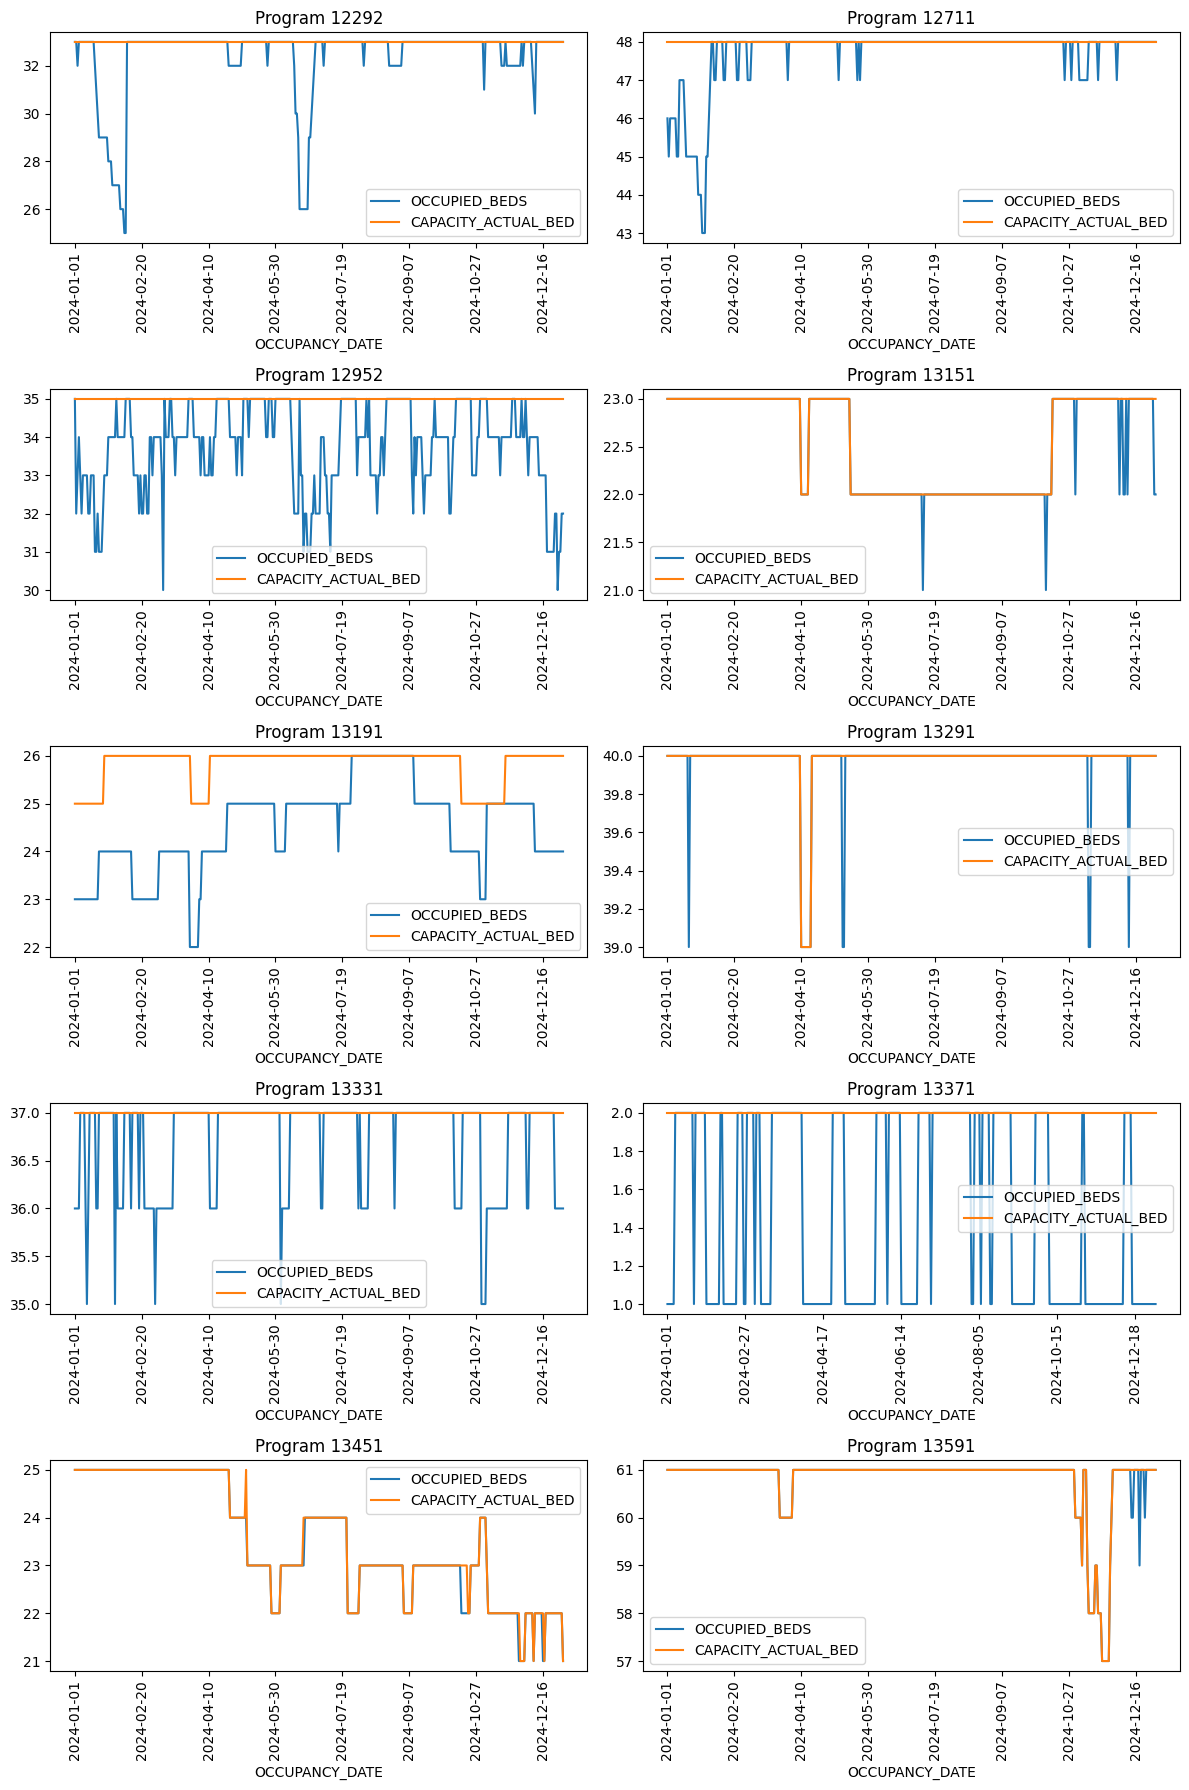

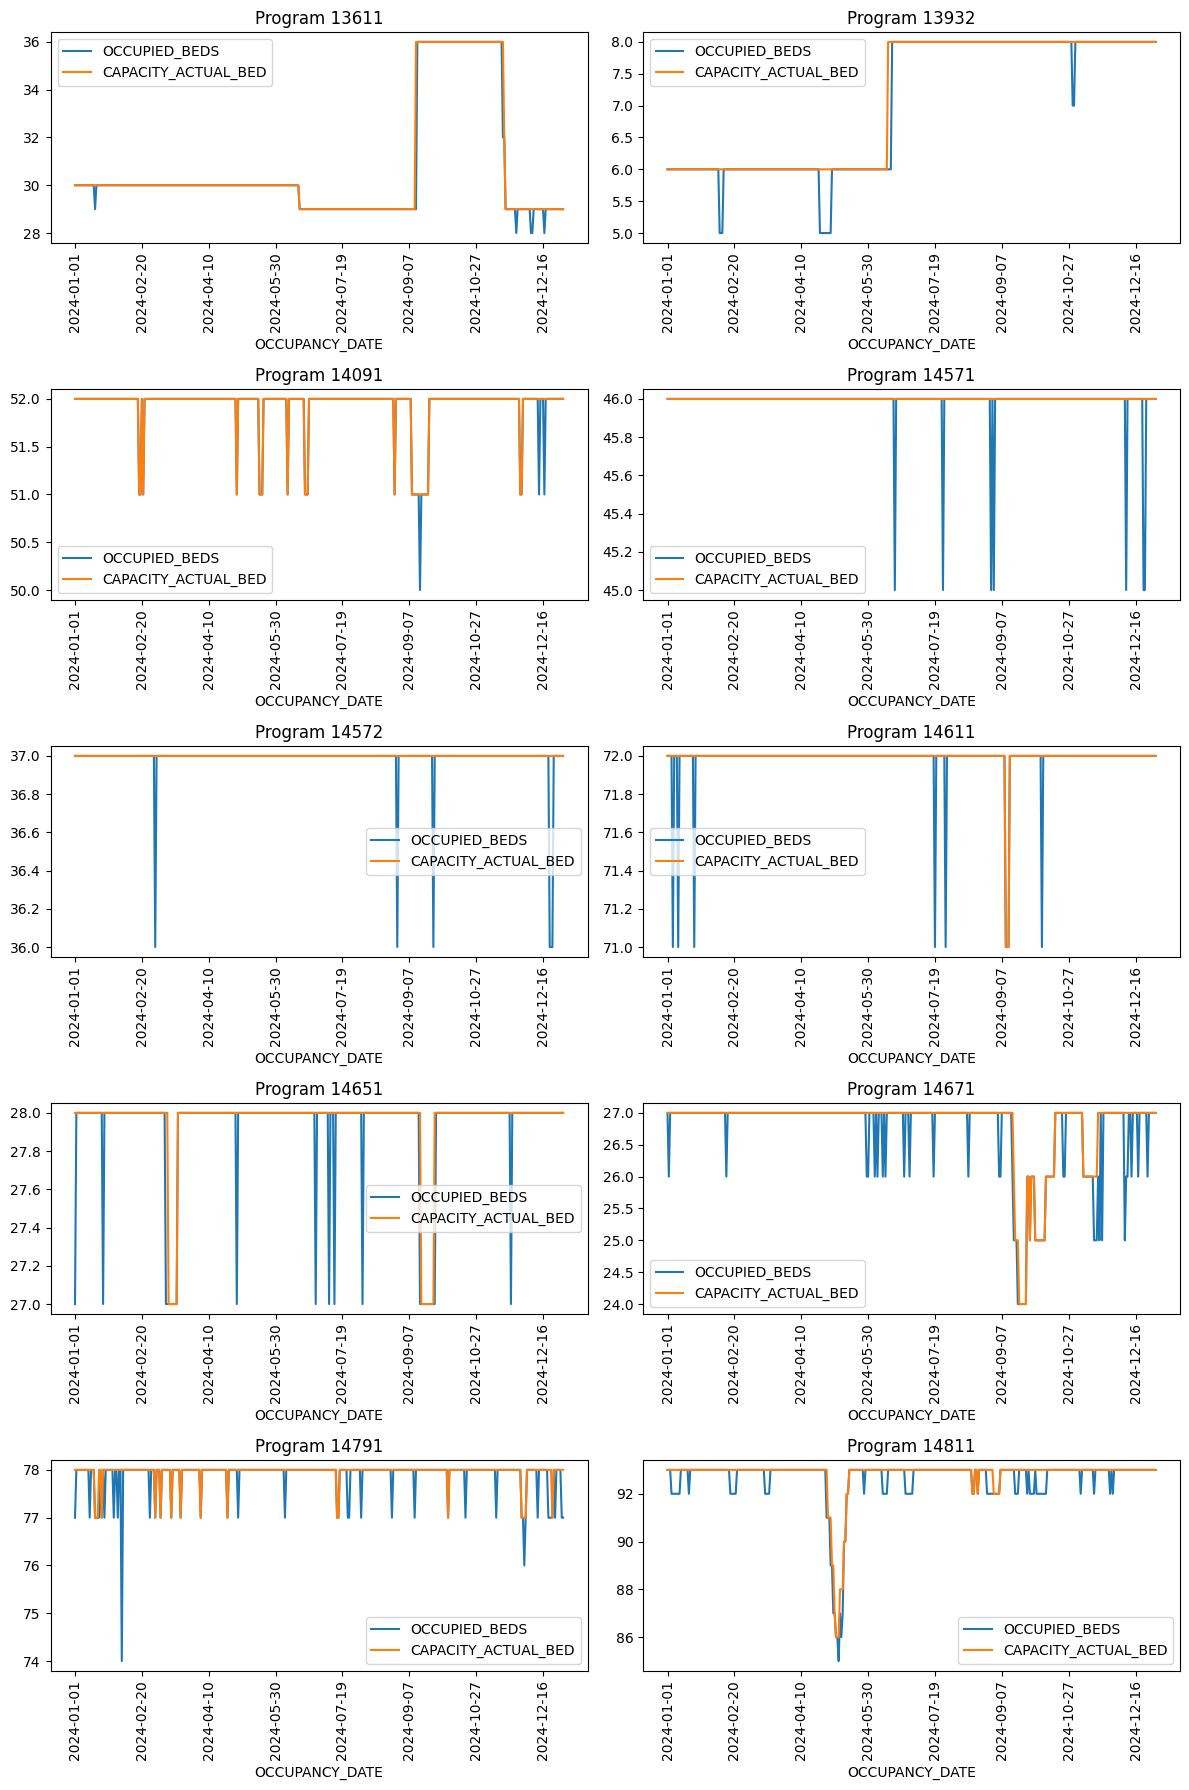

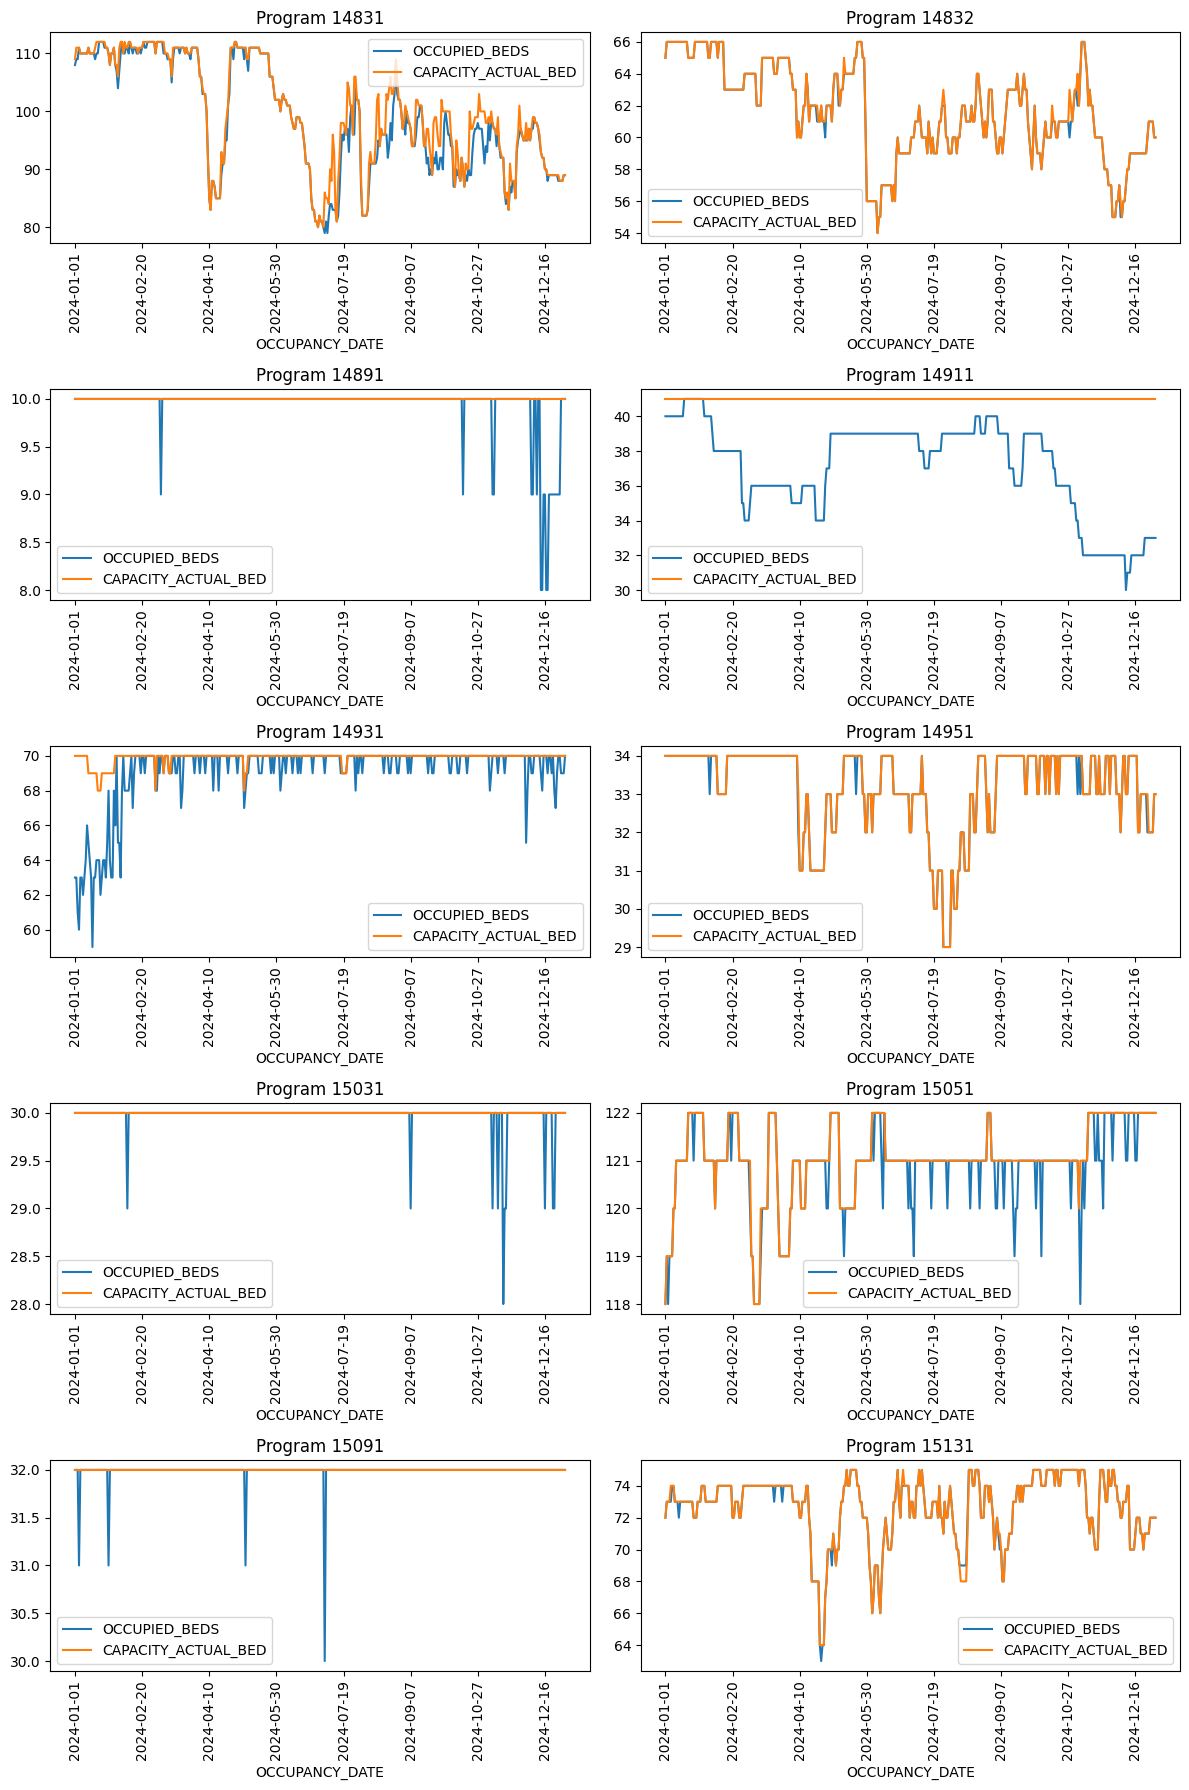

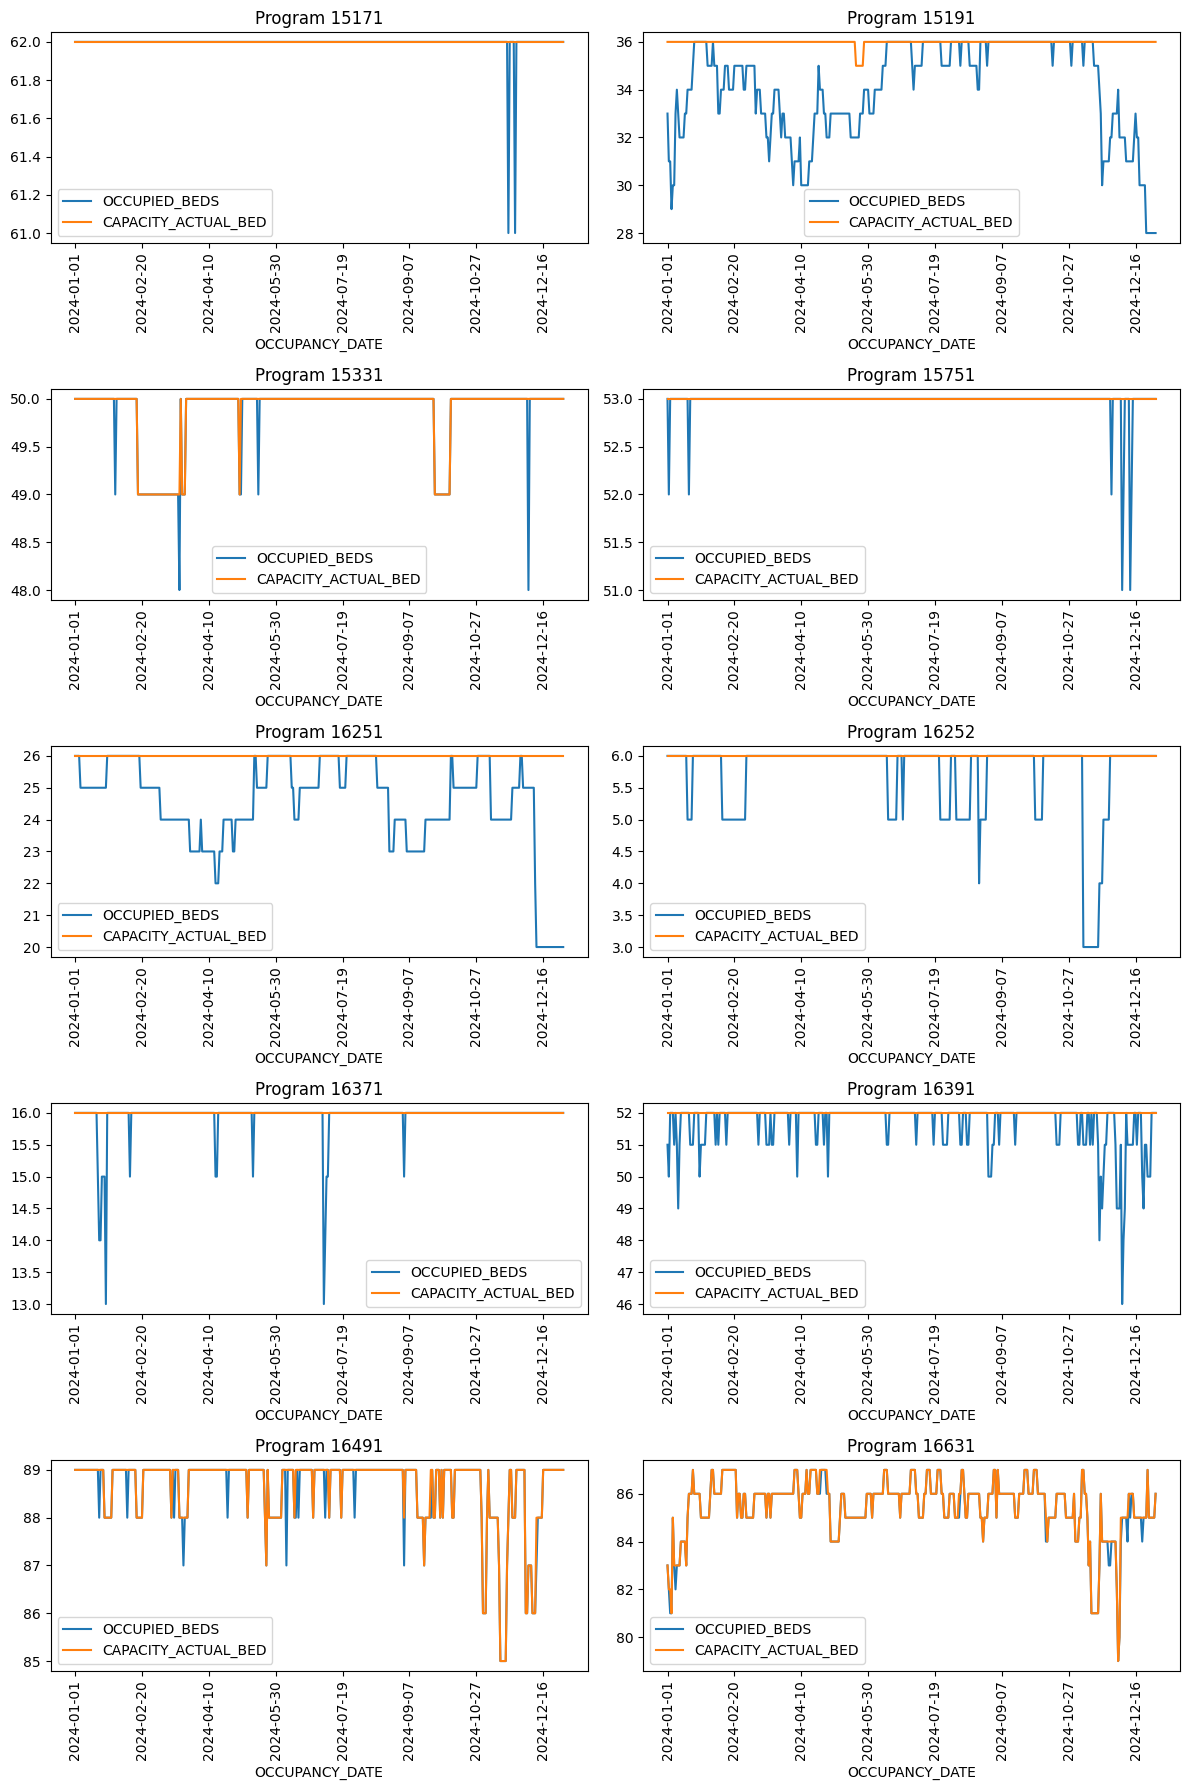

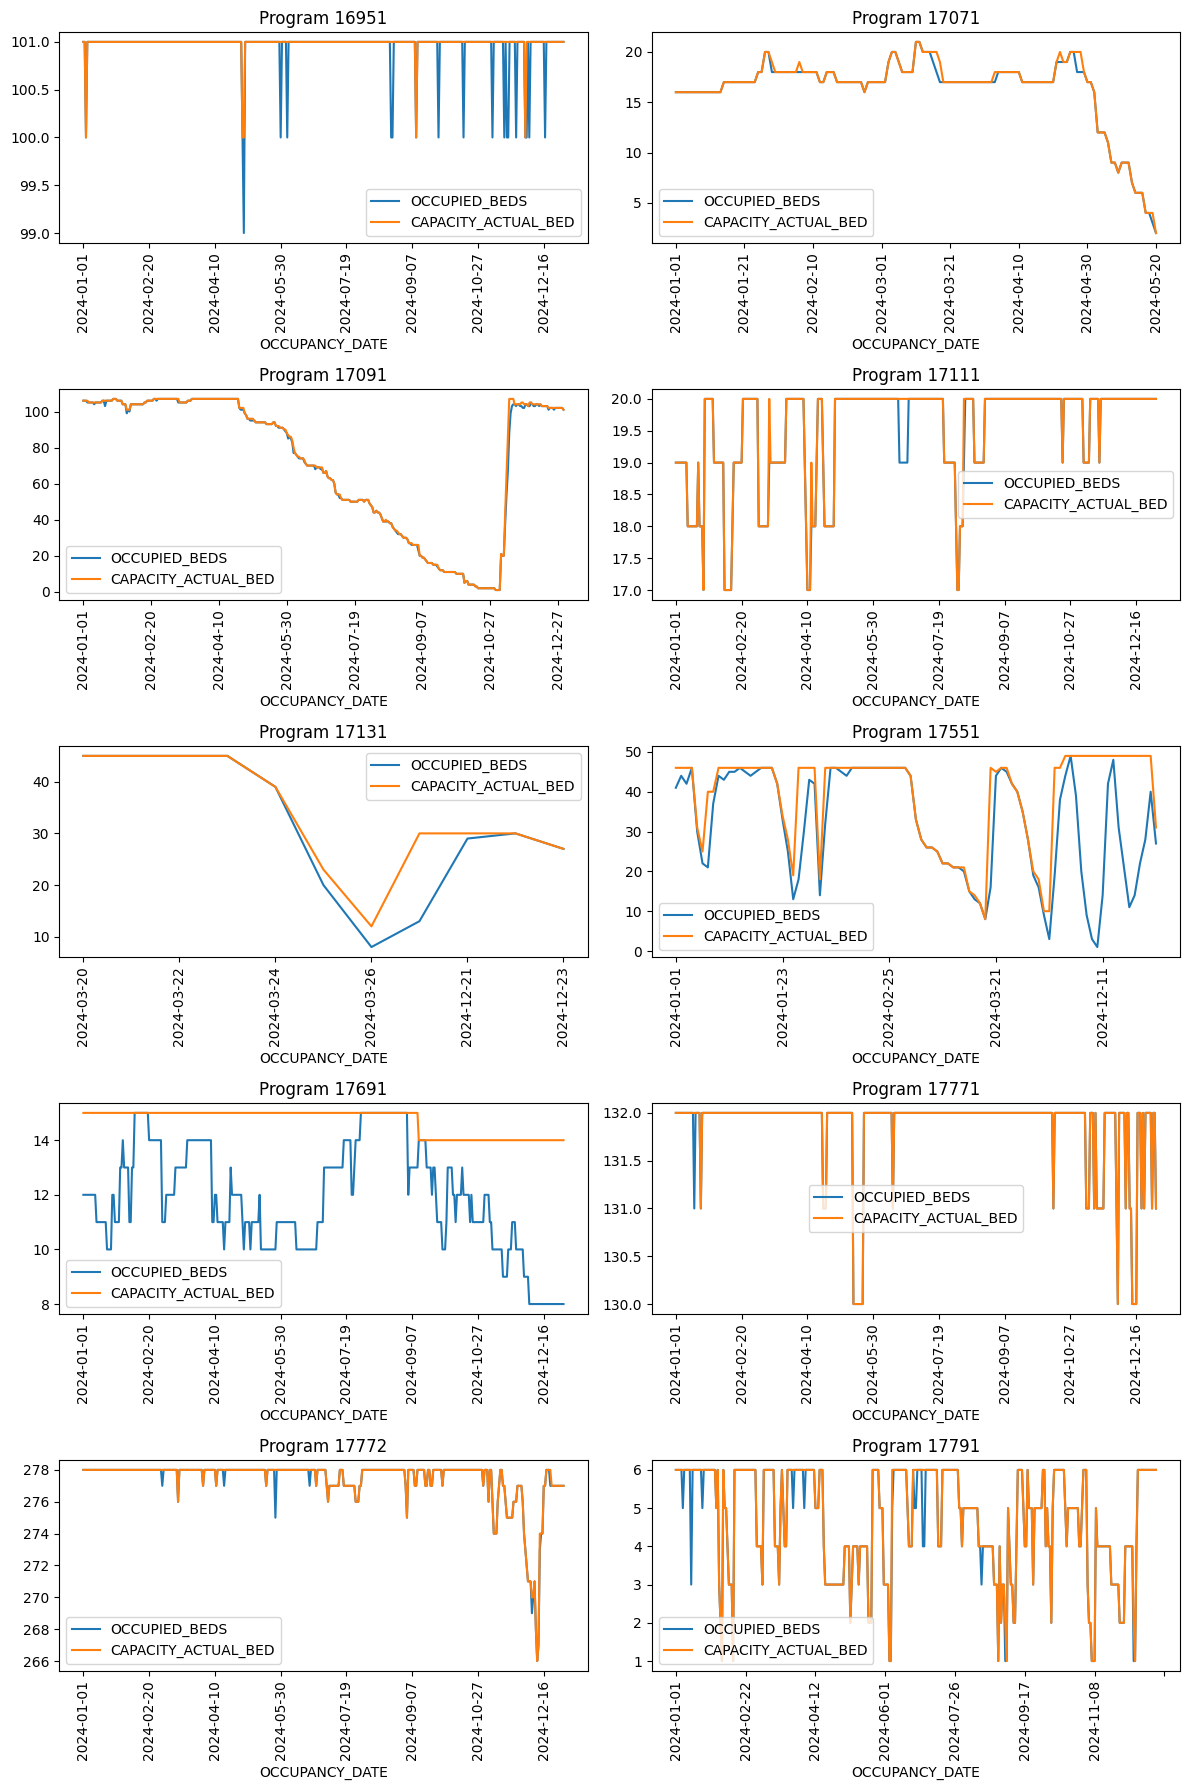

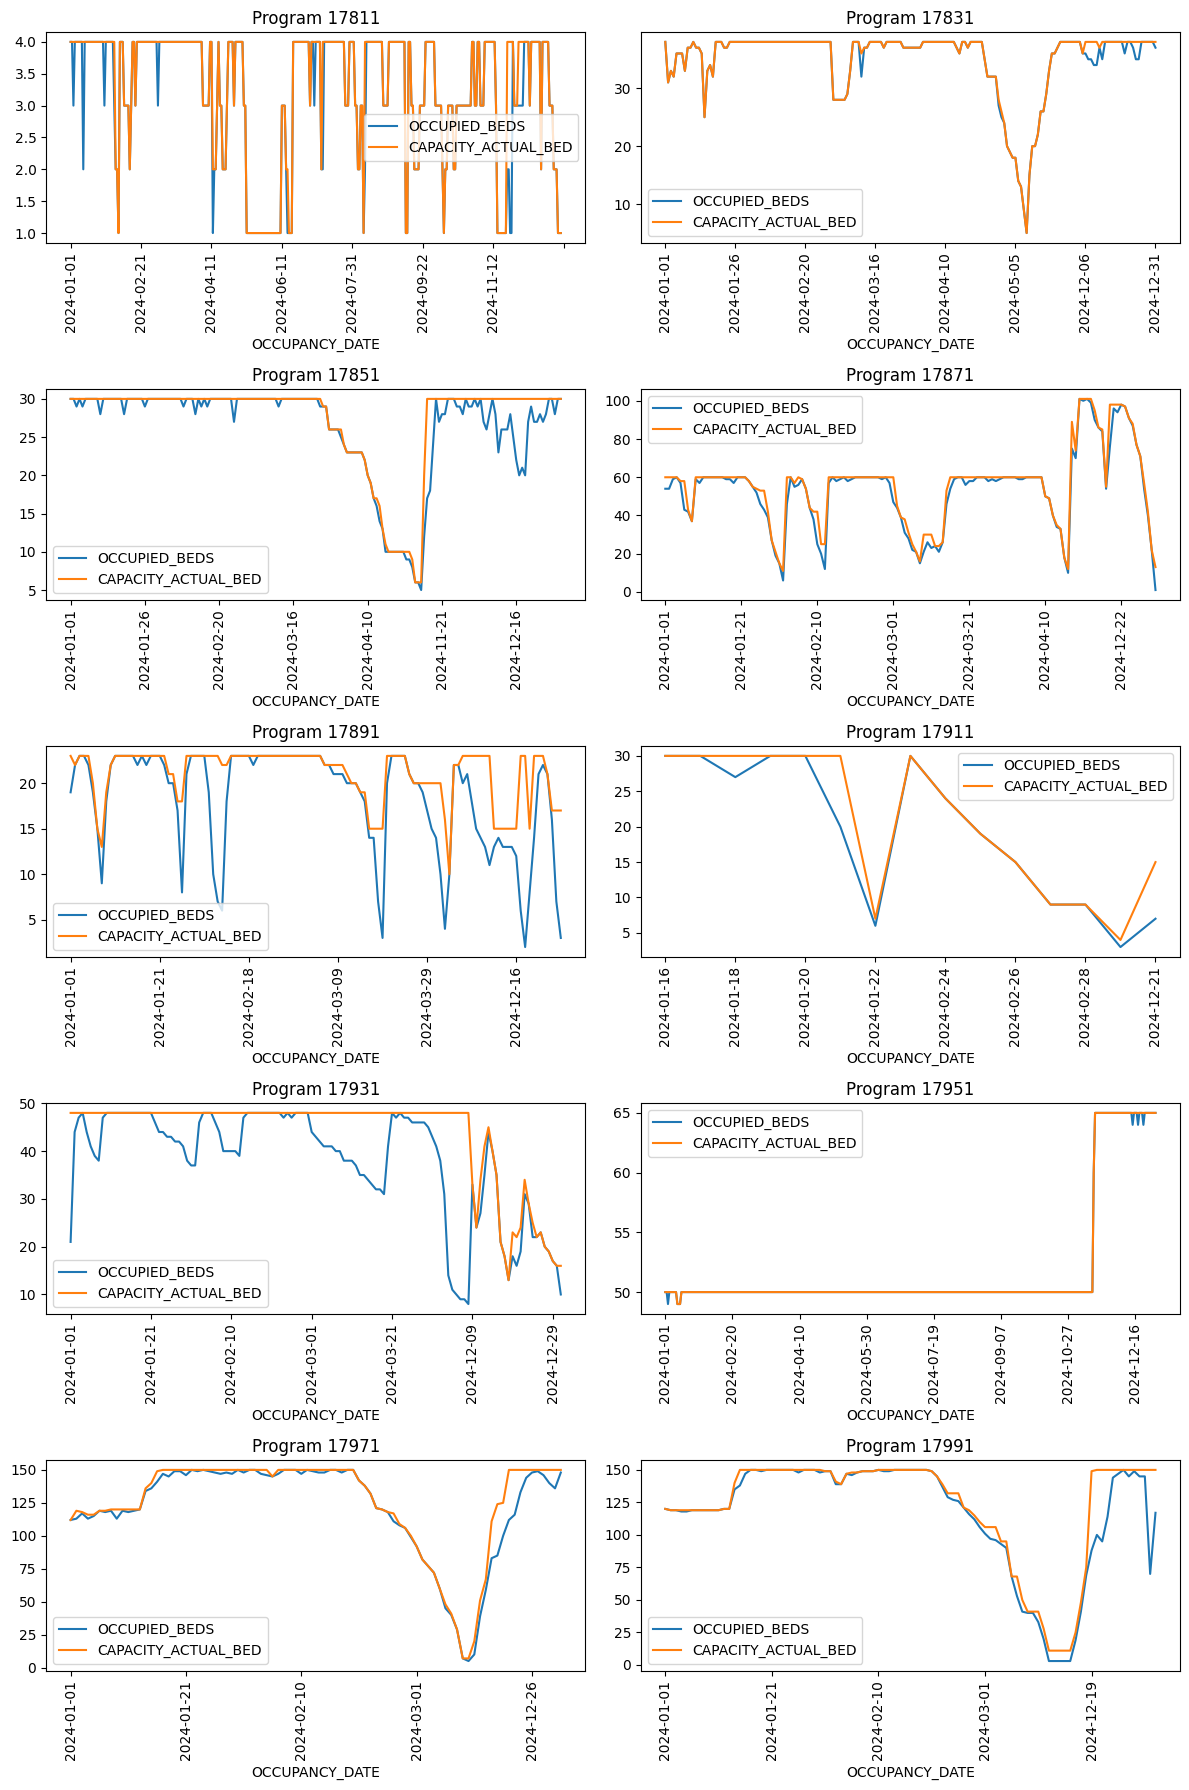

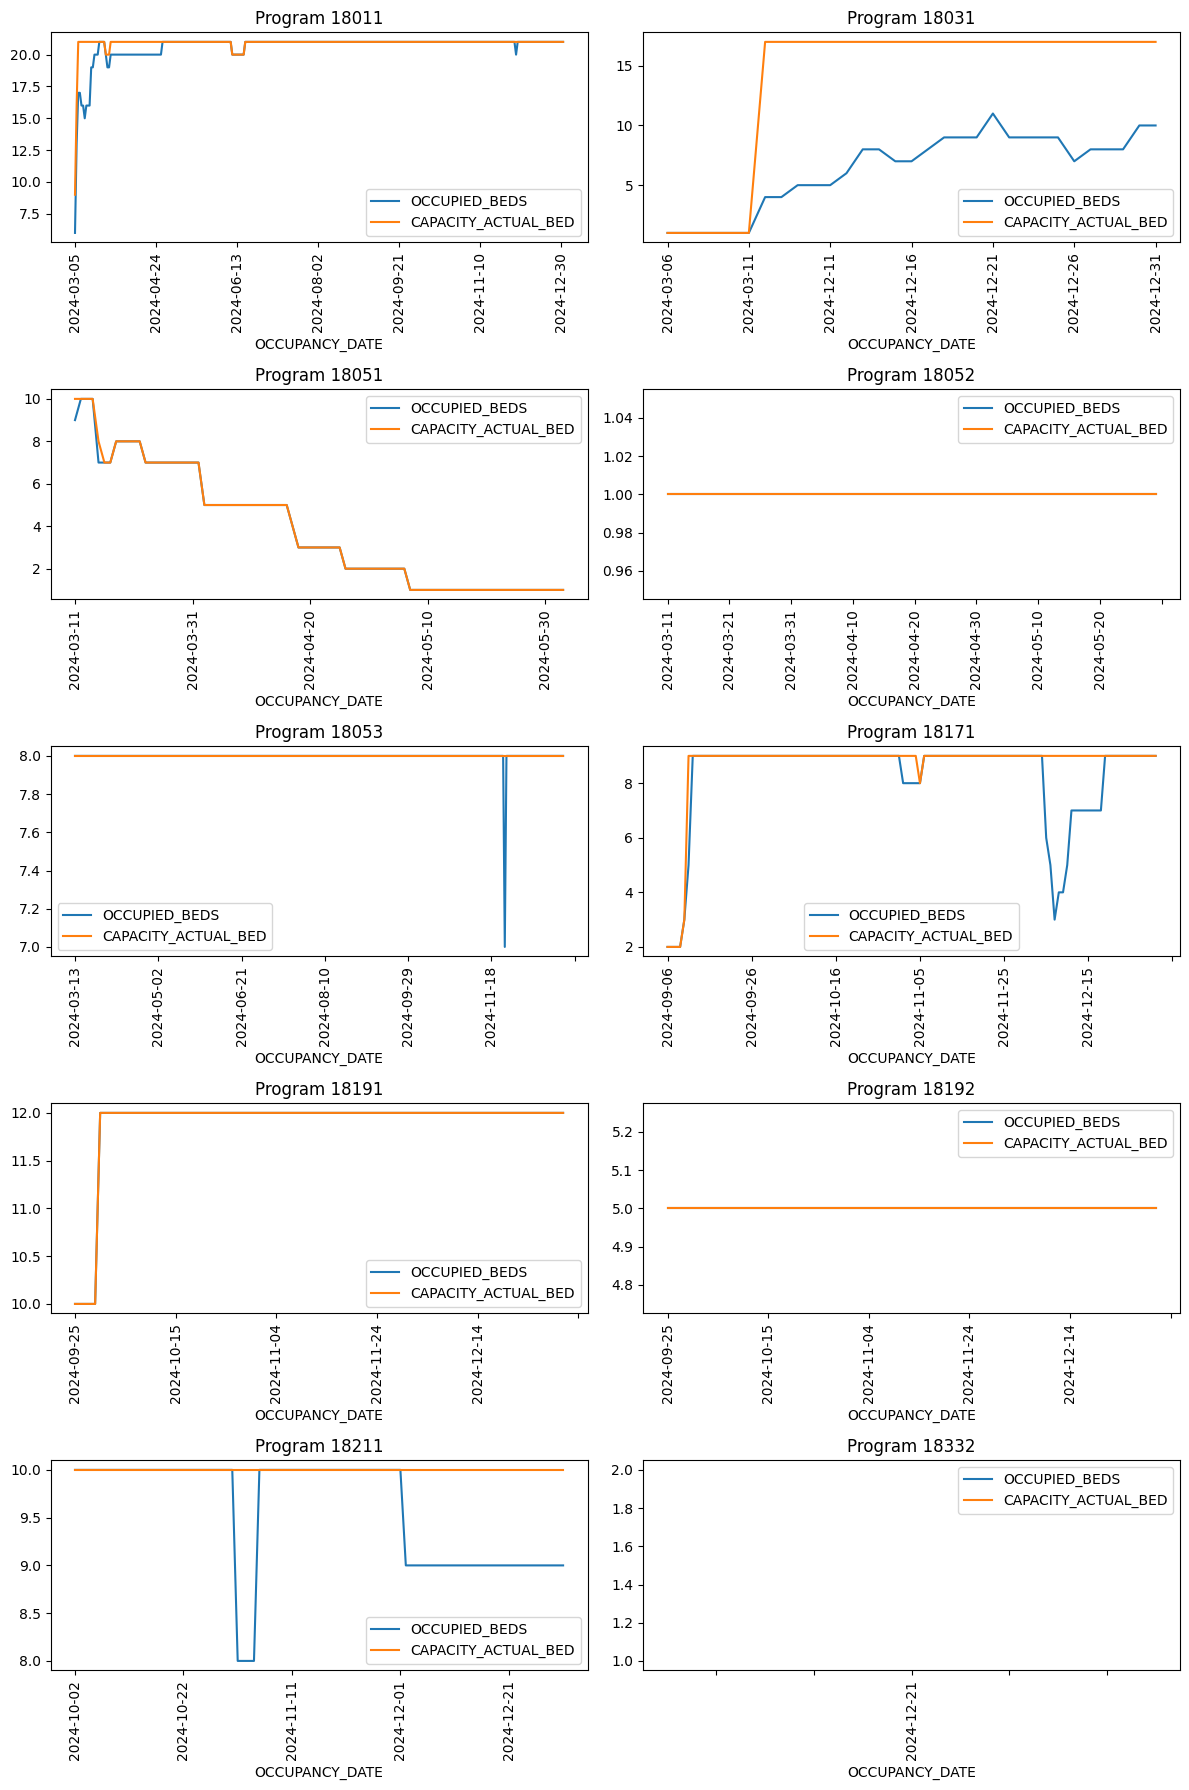

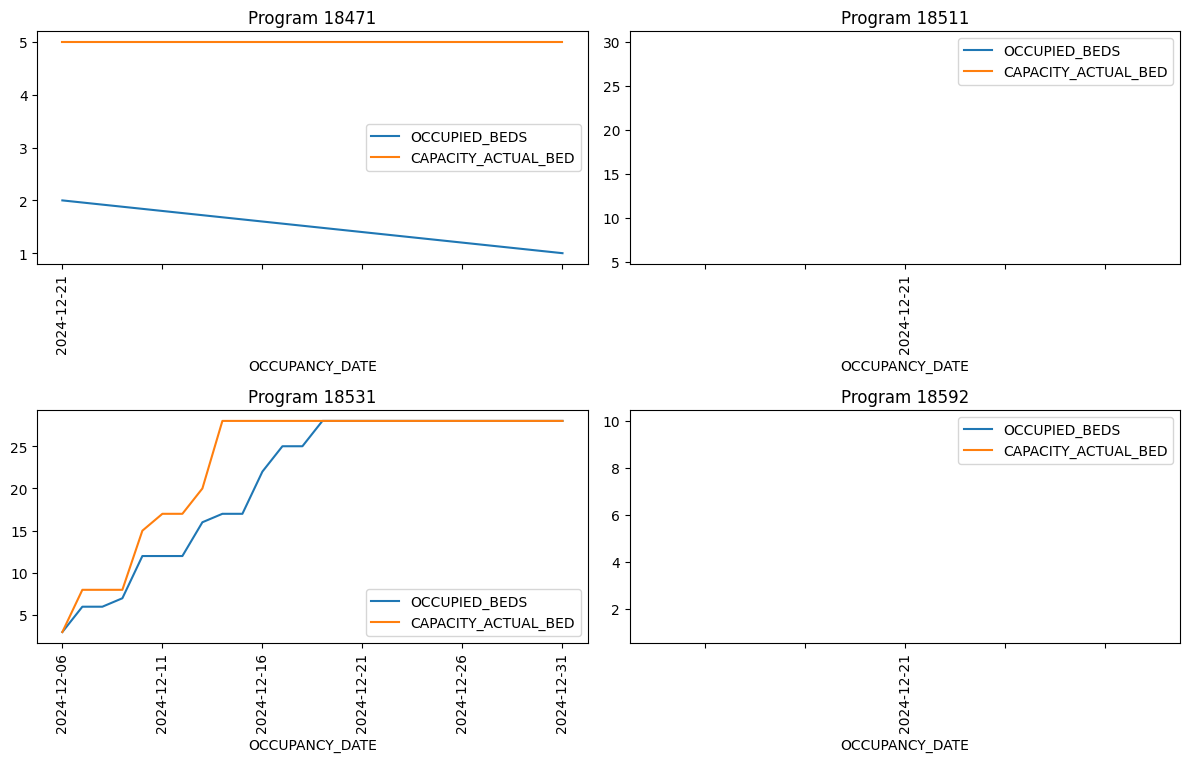

In [15]:
import matplotlib.pyplot as plt

grouped = daily_occ_cap_df.groupby("PROGRAM_ID")
program_groups = list(grouped)

plots_per_page = 10
for i in range(0, len(program_groups), plots_per_page):
    fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(12, 18)) 
    axes = axes.flatten()

    page_groups = program_groups[i : i + plots_per_page]

    for ax, (program_id, df) in zip(axes, page_groups):
        df = df.set_index("OCCUPANCY_DATE")[["OCCUPIED_BEDS", "CAPACITY_ACTUAL_BED"]].sort_index()
        df.plot(ax=ax, title=f"Program {program_id}")
        
        ax.tick_params(axis='x', labelrotation=90)

    for j in range(len(page_groups), plots_per_page):
        axes[j].set_visible(False)

    plt.tight_layout()
    plt.show()

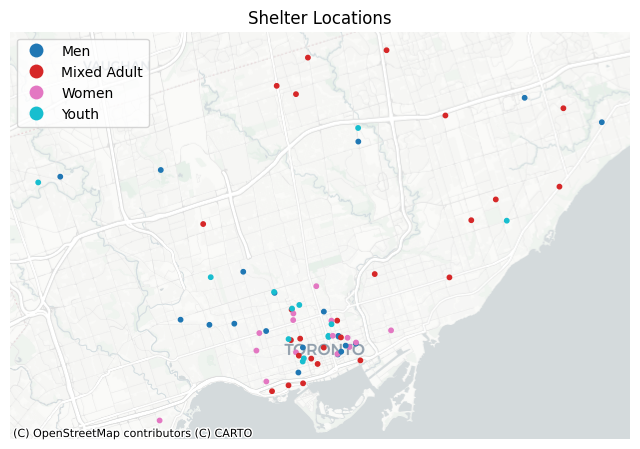

In [16]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as cx

from geopandas.tools import geocode

daily_occ_cap_df["FULL_ADDRESS"] = (
    daily_occ_cap_df["LOCATION_ADDRESS"].fillna("").str.strip()
    + ", "
    + daily_occ_cap_df["LOCATION_CITY"].fillna("").str.strip()
    + ", "
    + daily_occ_cap_df["LOCATION_PROVINCE"].fillna("").str.strip()
    + ", Canada"
)

daily_occ_cap_filtered_df = daily_occ_cap_df[[
    "FULL_ADDRESS",
    "PROGRAM_AREA",
    "SECTOR"
]]

unique_addrs = (
    daily_occ_cap_filtered_df
    .dropna(subset=["FULL_ADDRESS"])
    .drop_duplicates(subset=["FULL_ADDRESS"])
    .reset_index(drop=True)
)

unique_addrs = unique_addrs.drop([34, 74, 77])

gdf_geo = geocode(unique_addrs['FULL_ADDRESS'], provider="nominatim", user_agent="geo_example", timeout=10)

gdf = gpd.GeoDataFrame(
    pd.concat([unique_addrs.reset_index(drop=True), gdf_geo[['geometry']]], axis=1),
    geometry='geometry',
    crs='EPSG:4326'
)

gdf_3857 = gdf.to_crs(epsg=3857)

ax = gdf_3857.plot(figsize=(8, 8), markersize=10, column="SECTOR", legend=True)
cx.add_basemap(ax, source=cx.providers.CartoDB.Positron)  
ax.set_axis_off()
plt.title("Shelter Locations")
plt.show()

### Scope: refugee, toronto, bed based

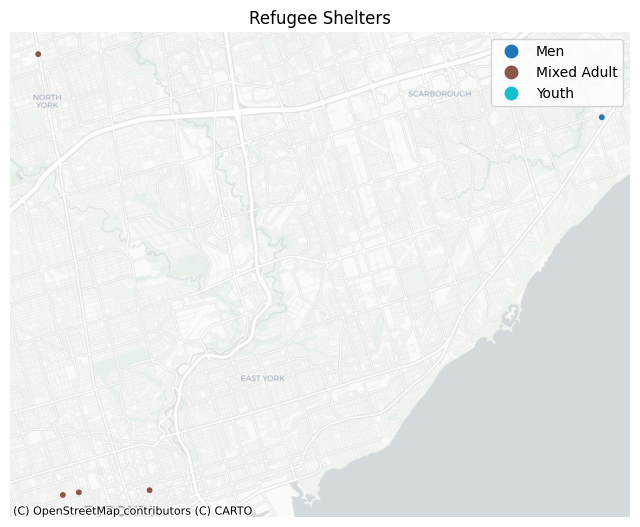

In [17]:
refugee_shelters_df = gdf_3857[
    (gdf_3857["PROGRAM_AREA"] == "Temporary Refugee Response")
    | (gdf_3857["PROGRAM_AREA"] == "Base Program - Refugee")
]

ax = refugee_shelters_df.plot(figsize=(8, 8), markersize=10, column="SECTOR", legend=True)
cx.add_basemap(ax, source=cx.providers.CartoDB.Positron)  
ax.set_axis_off()
plt.title("Refugee Shelters")
plt.show()